In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [47]:
inp_df1 = pd.read_csv("trades_round_1_day_-2_wn.csv",delimiter=";")
inp_df2 = pd.read_csv("trades_round_1_day_-1_wn.csv",delimiter=";")
inp_df3 = pd.read_csv("trades_round_1_day_0_wn.csv",delimiter=";")
price_df1 = pd.read_csv("prices_round_1_day_-2.csv",delimiter=";")
price_df2 = pd.read_csv("prices_round_1_day_-1.csv",delimiter=";")
price_df3 = pd.read_csv("prices_round_1_day_0.csv",delimiter=";")
prices_am1 = pd.DataFrame(price_df1[price_df1["product"] == "AMETHYSTS"]).reset_index(drop = True)
prices_am2 = pd.DataFrame(price_df2[price_df2["product"] == "AMETHYSTS"]).reset_index(drop = True)
prices_am3 = pd.DataFrame(price_df3[price_df3["product"] == "AMETHYSTS"]).reset_index(drop = True)
prices_str1 = pd.DataFrame(price_df1[price_df1["product"] == "STARFRUIT"]).reset_index(drop = True)
prices_str2 = pd.DataFrame(price_df2[price_df2["product"] == "STARFRUIT"]).reset_index(drop = True)
prices_str3 = pd.DataFrame(price_df3[price_df3["product"] == "STARFRUIT"]).reset_index(drop = True)
df1_am = pd.DataFrame(inp_df1[inp_df1["symbol"] == "AMETHYSTS"]).reset_index(drop=True)
df2_am = pd.DataFrame(inp_df2[inp_df2["symbol"] == "AMETHYSTS"]).reset_index(drop=True)
df3_am = pd.DataFrame(inp_df3[inp_df3["symbol"] == "AMETHYSTS"]).reset_index(drop=True)
df1_str = pd.DataFrame(inp_df1[inp_df1["symbol"] == "STARFRUIT"]).reset_index(drop=True)
df2_str = pd.DataFrame(inp_df2[inp_df2["symbol"] == "STARFRUIT"]).reset_index(drop=True)
df3_str = pd.DataFrame(inp_df3[inp_df3["symbol"] == "STARFRUIT"]).reset_index(drop=True)
trades_am = pd.concat([df1_am,df2_am,df3_am], axis= 0, ignore_index=True)
trades_str = pd.concat([df1_str,df2_str,df3_str], axis= 0, ignore_index=True)
prices_am = pd.concat([prices_am1,prices_am2,prices_am3], axis= 0, ignore_index=True)
prices_str = pd.concat([prices_str1,prices_str2,prices_str3], axis= 0, ignore_index=True)

In [48]:
prices_am

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
2,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
3,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
4,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
29996,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
29997,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
29998,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [51]:
def pnl (text, prices, trades):
  # names = ["Valentina", "Vinnie", "Vladimir", "Vivian", "Celeste", "Colin", "Carlos", "Camilla", "Pablo", "Penelope", "Percy", "Petunia", "Ruby", "Remy", "Rihanna", "Raj", "Amelia", "Adam", "Alina", "Amir"]
  names = trades["buyer"].unique()
  print("- for " + f"{text}")
  blacklisted = {"Remy", "Ruby", "Rhianna", "Adam", "Amelia"}
  for name in names:
      if name in blacklisted:
        continue
      temp1 = trades[trades["buyer"] == f"{name}"]
      temp2 = trades[trades["seller"] == f"{name}"]
      buys = (temp1["price"]*temp1["quantity"]).sum()
      sells = (temp2["price"]*temp2["quantity"]).sum()
      position = temp1["quantity"].sum()-temp2["quantity"].sum()
      mid = int(prices[-1:]["mid_price"].iloc[0])
      print(f"{name} pnl: " + str(sells-buys+position*mid) + ", position: " + str(position))
pnl("am1", prices_am1, df1_am)
pnl("am2", prices_am2, df2_am)
pnl("am3", prices_am3, df3_am)

- for am1
Vinnie pnl: 3176.0, position: 9
Valentina pnl: 10187.0, position: -122
Vladimir pnl: 2200.0, position: -20
- for am2
Vinnie pnl: 3026.0, position: 56
Valentina pnl: 10751.0, position: 78
Vladimir pnl: 2150.0, position: 19
- for am3
Valentina pnl: 9480.0, position: 32
Vladimir pnl: 1998.0, position: 89
Vinnie pnl: 3164.0, position: 4


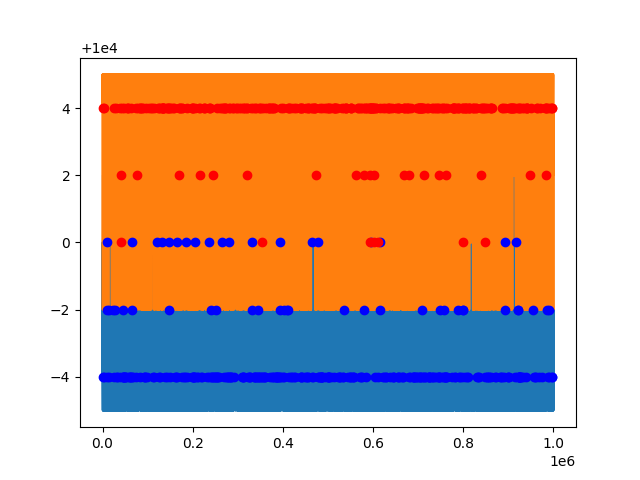

In [60]:
fig, axes = plt.subplots()
axes.plot(prices_am1["timestamp"], prices_am1["bid_price_1"])
axes.plot(prices_am1["timestamp"], prices_am1["ask_price_1"])
axes.plot(df1_am[df1_am["buyer"] == "Vinnie"]["timestamp"], df1_am[df1_am["buyer"] == "Vinnie"]["price"], 'bo')
axes.plot(df1_am[df1_am["seller"] == "Vinnie"]["timestamp"], df1_am[df1_am["seller"] == "Vinnie"]["price"], 'ro')
plt.show()

In [11]:

differences = pd.Series(prices_am["mid_price"].tolist())
print("OVERALL MEAN: " + str(differences.mean()))
print("OVERALL STD: " + str(differences.std()))
diff3 = pd.Series(prices_am1["mid_price"].to_list())
print("MEAN1: " + str(diff3.mean()))
print("STD1: " + str(diff3.std()))
diff4 = pd.Series(prices_am2["mid_price"].to_list())
print("MEAN2: " + str(diff4.mean()))
print("STD2: " + str(diff4.std()))
diff5 = pd.Series(prices_am3["mid_price"].to_list())
print("MEAN3: " + str(diff5.mean()))
print("STD3: " + str(diff5.std()))

OVERALL MEAN: 9999.99655
OVERALL STD: 1.4965920476508963
MEAN1: 10000.0035
STD1: 1.5138417756463747
MEAN2: 9999.9864
STD2: 1.4796060162747173
MEAN3: 9999.99975
STD3: 1.4962281936191213


In [6]:
prices_am.index *= 10
prices_str.index *= 10

In [18]:
pnl("str1", prices_str1, df1_str)
pnl("str2", prices_str2, df2_str)
pnl("str3", prices_str3, df3_str)

- for str1
Valentina pnl: 50279.0, position: 698
Vladimir pnl: 953.0, position: -36
- for str2
Valentina pnl: 13827.0, position: 356
Vladimir pnl: 2079.0, position: -38
- for str3
Valentina pnl: 18455.0, position: 356
Vladimir pnl: 1585.0, position: -38


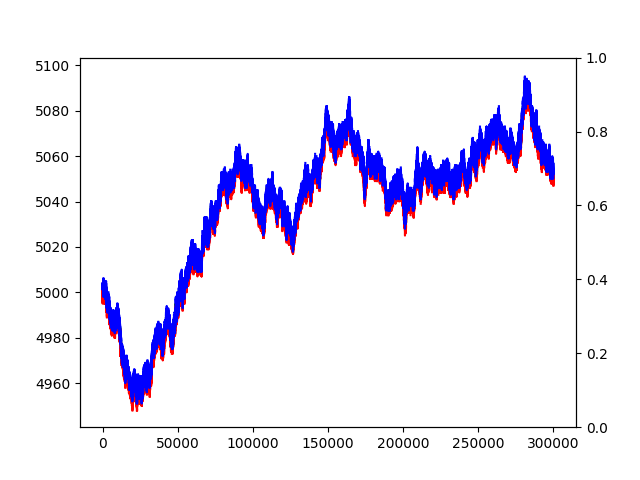

In [19]:
%matplotlib ipympl
fig, axes = plt.subplots()
axes.plot(prices_str.index, prices_str["mid_price"], color = "green")
axes.plot(prices_str.index, prices_str["bid_price_1"], color = "red")
axes.plot(prices_str.index, prices_str["bid_price_2"], color = "red")
axes.plot(prices_str.index, prices_str["bid_price_3"], color = "red")
axes.plot(prices_str.index, prices_str["ask_price_1"], color = "blue")
axes.plot(prices_str.index, prices_str["ask_price_2"], color = "blue")
axes.plot(prices_str.index, prices_str["ask_price_3"], color = "blue")
axes1 = axes.twinx()
# axes1.scatter(df1_str["timestamp"], df1_str["price"])